---
# Feature Engineering
---
In this notebook, we will be engineering the features to be use in various classification algorithms.

1. We will discarding the columns that will not be used by the clustering algorithms (either the data bring no valuable information or it contains too many categories).
2. We will be encoding the nominal numerical columns to use the information later on in the clustering algorithms.
3. We will be doing a Principal Component Analysis (PCA) to evualuate how many component is needed to represent the dataset.
   - **For the entire dataset** - Need between 60 and 80 components to capture more than 90% of the variance.
   - **For the data subset** - Need between 6 and 8 components to capture more than 90% of the variance.</br>
 </br>
4. We will be looking into the correlation to make sure that the data cleaning was made appropriately and that no highly correlated columns remains.
   - In the clustering algorithms, we should use 'Climate Change' or its 3 components 'Climate Change - Biogenic Emissions',  'Climate Change - Fossil Emissions' and 'Climate Change - Emissions from Land Use Change'.
</br></br>
5. Finally, a new excel file will be created containing the Engineered features dataset to be used later on in various clustering algorithms.




---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np
import json

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Read data file

In [2]:
df = pd.read_excel('../data/AGRIBALYSE3.2_Synthese_cleaned.xlsx')
df

,Food Group,Food Sub-group,LCI Name,Season Code,Airplane Code,Delivery,Packaging,Preparation,EF Score,Climate Change,...,Marine Eutrophication,Terrestrial Eutrophication,Ecotoxicity for Freshwater Aquatic Ecosystems,Land Use,Water Resource Depletion,Energy Resource Depletion,Mineral Resource Depletion,Climate Change - Biogenic Emissions,Climate Change - Fossil Emissions,Climate Change - Emissions from Land Use Change
0,aides culinaires et ingrédients divers,aides culinaires,"Aromatic stock cube, for fish, dehydrated",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.874152,7.584518,...,0.026783,0.137099,70.183757,106.309500,3.380742,700.159580,0.000051,0.103694,7.459628,0.021197
1,aides culinaires et ingrédients divers,aides culinaires,Topping sauce for pizza,2,0,Ambiant (long),PACK PROXY,Pas de préparation,0.148315,0.940414,...,0.004162,0.030263,11.027442,67.673943,2.468103,24.405351,0.000006,0.033626,1.015114,-0.108325
2,aides culinaires et ingrédients divers,aides culinaires,"Soy ""cream"" preparation",2,0,Ambiant (long),PACK PROXY,Pas de préparation,0.147701,1.174072,...,0.007233,0.024434,30.835753,116.492280,0.422468,22.429809,0.000004,0.025180,0.964544,0.184348
3,aides culinaires et ingrédients divers,algues,"Seaweed, agar, raw",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.547348,11.786920,...,0.015034,0.143648,57.867520,26.718351,4.833158,395.946390,0.000079,0.040063,11.740311,0.006545
4,aides culinaires et ingrédients divers,algues,"Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.547348,11.786920,...,0.015034,0.143648,57.867520,26.718351,4.833158,395.946390,0.000079,0.040063,11.740311,0.006545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,"viandes, œufs, poissons",viandes cuites,"Veal, knuckle or shank, braised or boiled",2,0,Glacé,PACK AGB,Cuisson à l'eau,2.744841,29.685425,...,0.091173,1.457487,391.691640,1336.417000,4.021206,149.244380,0.000057,15.861507,11.205989,2.617929
2447,"viandes, œufs, poissons",viandes cuites,"Veal, tenderloin, grilled/pan-fried",2,0,Glacé,PACK AGB,Poêle,2.719832,29.389500,...,0.091187,1.457302,392.319170,1339.161800,3.972692,141.891310,0.000056,15.821821,10.946006,2.621672
2448,"viandes, œufs, poissons",viandes cuites,"Veal, tenderloin, roasted",2,0,Glacé,PACK AGB,Four,2.738488,29.350392,...,0.091077,1.457291,392.244620,1336.137200,3.991295,149.677240,0.000059,15.821740,10.910768,2.617884
2449,"viandes, œufs, poissons",viandes cuites,"Veal, roast, cooked",2,0,Glacé,PACK AGB,Four,3.418940,36.767887,...,0.113935,1.821645,490.596670,1670.079500,4.984198,184.179660,0.000072,19.864699,13.630845,3.272343


### List of columns to work with

In [3]:
col2discard = ['Food Group',
               'LCI Name']

col2keep = ['Season Code',
            'Airplane Code',
            'EF Score', 
            'Climate Change',
            'Ozone Layer Depletion', 
            'Ionizing Radiation', 
            'Photochemical Ozone Formation', 
            'Fine Particles', 
            'Toxicological Effects (Non-carcinogenic)', 
            'Toxicological Effects (Carcinogenic)', 
            'Terrestrial and Freshwater Acidification', 
            'Freshwater Eutrophication', 
            'Marine Eutrophication', 
            'Terrestrial Eutrophication', 
            'Ecotoxicity for Freshwater Aquatic Ecosystems', 
            'Land Use', 
            'Water Resource Depletion', 
            'Energy Resource Depletion', 
            'Mineral Resource Depletion', 
            'Climate Change - Biogenic Emissions', 
            'Climate Change - Fossil Emissions', 
            'Climate Change - Emissions from Land Use Change'
            ]

col2encode = ['Food Sub-group', 
              'Delivery', 
              'Packaging', 
              'Preparation'              
             ]

---
### Removing unecessary columns
---

I will be removing the availability_date column, since I don't believe that this can affect the price.

In [4]:
df = df.drop(columns = col2discard)

df.head(5)

,Food Sub-group,Season Code,Airplane Code,Delivery,Packaging,Preparation,EF Score,Climate Change,Ozone Layer Depletion,Ionizing Radiation,...,Marine Eutrophication,Terrestrial Eutrophication,Ecotoxicity for Freshwater Aquatic Ecosystems,Land Use,Water Resource Depletion,Energy Resource Depletion,Mineral Resource Depletion,Climate Change - Biogenic Emissions,Climate Change - Fossil Emissions,Climate Change - Emissions from Land Use Change
0,aides culinaires,2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.874152,7.584518,2.932471e-07,30.251469,...,0.026783,0.137099,70.183757,106.309500,3.380742,700.159580,0.000051,0.103694,7.459628,0.021197
1,aides culinaires,2,0,Ambiant (long),PACK PROXY,Pas de préparation,0.148315,0.940414,2.703735e-08,0.558035,...,0.004162,0.030263,11.027442,67.673943,2.468103,24.405351,0.000006,0.033626,1.015114,-0.108325
2,aides culinaires,2,0,Ambiant (long),PACK PROXY,Pas de préparation,0.147701,1.174072,3.382798e-08,0.545093,...,0.007233,0.024434,30.835753,116.492280,0.422468,22.429809,0.000004,0.025180,0.964544,0.184348
3,algues,2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.547348,11.786920,6.270593e-07,11.185511,...,0.015034,0.143648,57.867520,26.718351,4.833158,395.946390,0.000079,0.040063,11.740311,0.006545
4,algues,2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.547348,11.786920,6.270593e-07,11.185511,...,0.015034,0.143648,57.867520,26.718351,4.833158,395.946390,0.000079,0.040063,11.740311,0.006545


---

### Encoding nominal categorical columns

---
As we have seen previously in the Data_Analysis.ipynb, there are six category columns.

Only those 4 nominal category column will be encoded:
  * Food Sub-group
  * Delivery
  * Packaging
  * Preparation

In [5]:
# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False) 

# Encode the categorical columns
encoded_cols = encoder.fit_transform(df[col2encode])

# Put the encoded column into a dataframe
tmp_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(col2encode))

# Removing categorical columns
df = df.drop(columns=col2encode)

# Join encoded dataframe to the rent_df dataframe
df = df.join(tmp_df)

df.head(5)

,Season Code,Airplane Code,EF Score,Climate Change,Ozone Layer Depletion,Ionizing Radiation,Photochemical Ozone Formation,Fine Particles,Toxicological Effects (Non-carcinogenic),Toxicological Effects (Carcinogenic),...,Delivery_Ambiant (long),Delivery_Ambiant (moyen),Delivery_Congelé,Delivery_Glacé,Packaging_PACK PROXY,Preparation_Four,Preparation_Micro-onde,Preparation_Pas de préparation,Preparation_Poêle,Preparation_Réfrigéré chez le consommateur
0,2,0,1.874152,7.584518,2.932471e-07,30.251469,0.025011,4.738923e-07,2.087261e-07,6.622400e-09,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,0,0.148315,0.940414,2.703735e-08,0.558035,0.003928,7.864125e-08,4.238290e-08,8.815249e-10,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2,0,0.147701,1.174072,3.382798e-08,0.545093,0.004025,6.420649e-08,2.658238e-08,2.141891e-09,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2,0,1.547348,11.786920,6.270593e-07,11.185511,0.051406,8.615935e-07,9.852629e-08,6.933245e-09,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2,0,1.547348,11.786920,6.270593e-07,11.185511,0.051406,8.615935e-07,9.852629e-08,6.933245e-09,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


---
### Investigating the relationships and distribution of each feature
---

---
### PCA Analysis
---
Conclusion :

**For the entire dataset**
- Need 80 components to capture close to 100% of the variance.
- Need 70 components to capture high 90% of the variance.
- Need 60 components to capture 90% of the variance.

**For the data subset**
- Need 8 components to capture close to 100% of the variance.
- Need 6 components to capture more than 90% of the variance.



**Amount of features in encoded dataset**

In [6]:
len(df.columns)

92

**Separate features into X and y**

In [7]:
X = df.drop(columns=['EF Score'])
y = df['EF Score']

# Columns to keep for subset X
cols=[ 
       #'Ozone Layer Depletion',
       #'Ionizing Radiation',
       'Photochemical Ozone Formation', 
       'Fine Particles',
       'Toxicological Effects (Non-carcinogenic)',
       'Toxicological Effects (Carcinogenic)',
       #'Terrestrial and Freshwater Acidification', 
       'Freshwater Eutrophication',
       'Marine Eutrophication', 
       #'Terrestrial Eutrophication',
       'Ecotoxicity for Freshwater Aquatic Ecosystems',
       'Land Use',
       'Water Resource Depletion', 
       'Energy Resource Depletion',
       'Mineral Resource Depletion',
       'Climate Change'
       #'Climate Change - Biogenic Emissions',
       #'Climate Change - Fossil Emissions',
       #'Climate Change - Emissions from Land Use Change'
     ]

# Create X subset
X_sub = df[cols].copy()

# Creating a new column combining both Toxicological Effects
X_sub['Toxicological Effects'] = X_sub[['Toxicological Effects (Non-carcinogenic)', 'Toxicological Effects (Carcinogenic)']].sum(axis=1)

# Creating a new column combining both Eutrophication
X_sub['Water Eutrophication'] = X_sub[['Freshwater Eutrophication', 'Marine Eutrophication', ]].sum(axis=1)

# Removing unneccessary columns
X_sub = X_sub.drop(columns=['Toxicological Effects (Non-carcinogenic)',
                            'Toxicological Effects (Carcinogenic)',
                            'Freshwater Eutrophication',
                            'Marine Eutrophication'])

**Scale features**

In [8]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_scaled = scaler.fit_transform(X)

# Scale X subset
X_sub_scaled = scaler.fit_transform(X_sub)

**Finding the best amount of features to use**

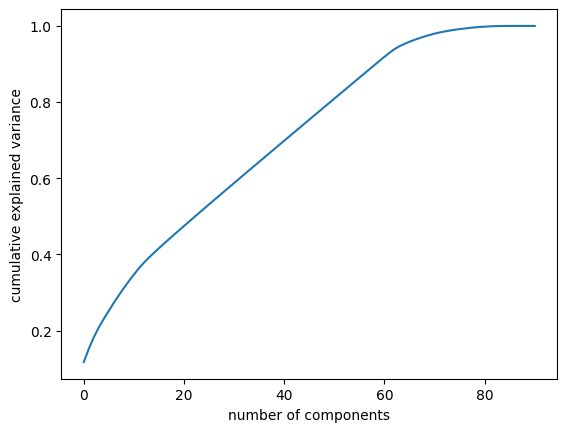

In [9]:
pca = PCA(whiten=True).fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [10]:
pca.explained_variance_ratio_

array([1.17889756e-01, 3.46228084e-02, 3.04089189e-02, 2.59278344e-02,
       2.24227103e-02, 2.11061844e-02, 2.10259640e-02, 1.97235668e-02,
       1.88296554e-02, 1.81990035e-02, 1.71990541e-02, 1.66122653e-02,
       1.45812984e-02, 1.33336801e-02, 1.24812975e-02, 1.22760638e-02,
       1.17850253e-02, 1.17065589e-02, 1.16188148e-02, 1.15410875e-02,
       1.14486350e-02, 1.14254876e-02, 1.13997243e-02, 1.13737552e-02,
       1.13424283e-02, 1.13123539e-02, 1.12525612e-02, 1.12289040e-02,
       1.12064751e-02, 1.11936726e-02, 1.11883210e-02, 1.11531995e-02,
       1.11369811e-02, 1.11305663e-02, 1.11119766e-02, 1.10997814e-02,
       1.10952235e-02, 1.10870648e-02, 1.10767795e-02, 1.10698022e-02,
       1.10658820e-02, 1.10609342e-02, 1.10503798e-02, 1.10432655e-02,
       1.10419200e-02, 1.10390076e-02, 1.10363791e-02, 1.10333910e-02,
       1.10302988e-02, 1.10258732e-02, 1.10210299e-02, 1.10194213e-02,
       1.10182531e-02, 1.10153865e-02, 1.10114008e-02, 1.10094271e-02,
      

In [11]:
pca.noise_variance_

0.0

**Let See the Cumulated Variance for 80 components**

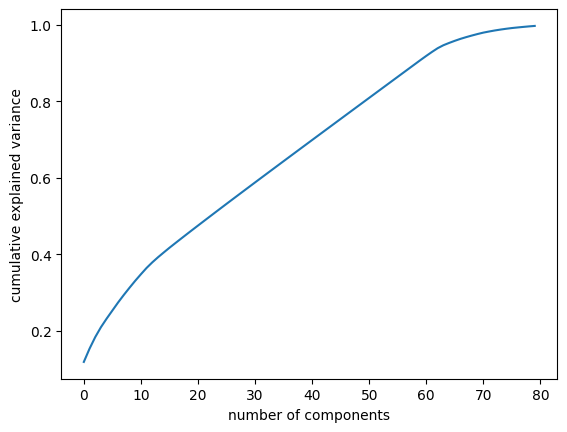

In [12]:
pca = PCA(n_components=80, whiten=True).fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**Let See the Cumulated Variance for 70 components**

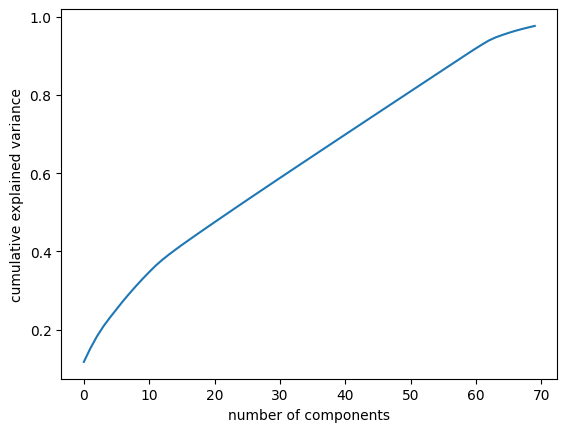

In [13]:
pca = PCA(n_components=70, whiten=True).fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**Let See the Cumulated Variance for 60 components**

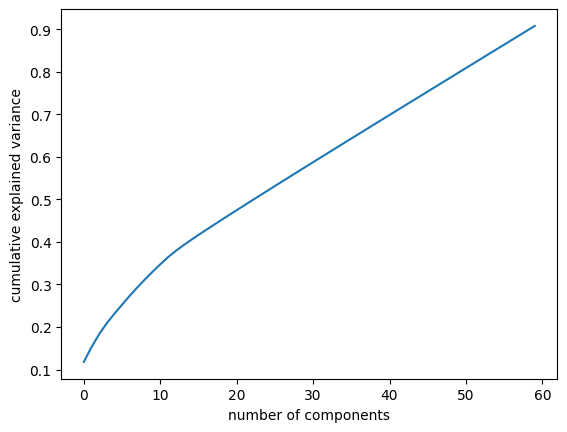

In [14]:
pca = PCA(n_components=60, whiten=True).fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**Finding the best amount of features to use on the data subset**

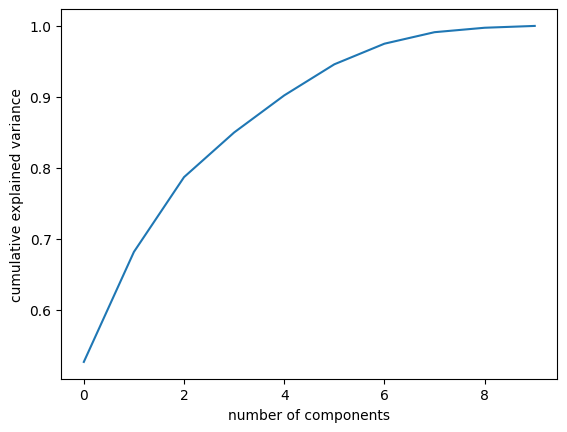

In [15]:
pca = PCA(whiten=True).fit(X_sub_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

---
### Investigating the correlation

---
**Low correlation (red & green)**

**High correlation (blue & purple)**

**Medium correlation (blue & purple)**

![Correlation Heatmap](../graph/Correlation_heatmap.png)


#### Conclusion :

- 





In [16]:
# Compute correlation
corr = df.drop(columns=['EF Score']).corr()
corr

,Season Code,Airplane Code,Climate Change,Ozone Layer Depletion,Ionizing Radiation,Photochemical Ozone Formation,Fine Particles,Toxicological Effects (Non-carcinogenic),Toxicological Effects (Carcinogenic),Terrestrial and Freshwater Acidification,...,Delivery_Ambiant (long),Delivery_Ambiant (moyen),Delivery_Congelé,Delivery_Glacé,Packaging_PACK PROXY,Preparation_Four,Preparation_Micro-onde,Preparation_Pas de préparation,Preparation_Poêle,Preparation_Réfrigéré chez le consommateur
Season Code,1.000000,0.001096,0.022090,0.003342,0.020401,0.016395,0.020757,0.019877,0.023525,0.020504,...,0.027219,-0.116950,0.007785,0.038275,0.036564,0.014323,0.013269,-0.026821,0.006672,0.005647
Airplane Code,0.001096,1.000000,0.012642,-0.001788,-0.014898,0.018906,-0.013617,0.002560,-0.015573,-0.007709,...,-0.020281,0.087141,-0.005801,-0.028519,-0.027244,-0.010672,-0.009887,-0.010439,-0.004972,0.094948
Climate Change,0.022090,0.012642,1.000000,0.008796,0.264577,0.446048,0.925439,0.828273,0.893676,0.930513,...,-0.227002,-0.179122,-0.089554,0.383869,-0.194224,0.227590,-0.085358,-0.132413,0.202593,-0.077573
Ozone Layer Depletion,0.003342,-0.001788,0.008796,1.000000,0.007048,0.031929,0.006674,-0.001744,0.004919,0.003919,...,-0.030828,0.039783,-0.008678,0.012641,-0.001807,-0.013494,-0.006920,0.025991,-0.004822,-0.009384
Ionizing Radiation,0.020401,-0.014898,0.264577,0.007048,1.000000,0.092218,0.205090,0.179630,0.329304,0.194179,...,-0.072802,-0.070802,0.001949,0.125857,-0.034657,0.169816,-0.035235,-0.082810,0.051397,-0.049083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Preparation_Four,0.014323,-0.010672,0.227590,-0.013494,0.169816,0.178819,0.256075,0.165018,0.229969,0.251035,...,-0.257132,-0.105656,0.000813,0.326915,-0.032004,1.000000,-0.129202,-0.534020,-0.064969,-0.054983
Preparation_Micro-onde,0.013269,-0.009887,-0.085358,-0.006920,-0.035235,-0.050297,-0.077920,-0.061846,-0.083690,-0.075678,...,0.011860,-0.073320,0.031367,0.040320,-0.070717,-0.129202,1.000000,-0.494703,-0.060186,-0.050935
Preparation_Pas de préparation,-0.026821,-0.010439,-0.132413,0.025991,-0.082810,-0.092918,-0.146356,-0.112199,-0.119752,-0.146835,...,0.183413,0.032767,-0.009543,-0.229904,0.030069,-0.534020,-0.494703,1.000000,-0.248763,-0.210525
Preparation_Poêle,0.006672,-0.004972,0.202593,-0.004822,0.051397,0.087183,0.188900,0.169957,0.175928,0.191703,...,-0.067153,-0.048891,-0.035314,0.116334,0.061531,-0.064969,-0.060186,-0.248763,1.000000,-0.025613


In [17]:
# Heatmap

# Create the figure and adjust its size
plt.figure(figsize = (100, 100))

# I want to use a discrete color palette
# to identify easily values close to 1 and 0
palette = sns.color_palette("tab20",10)
palette.reverse()

# Create the box plot
ax = sns.heatmap(data=corr, cmap=palette) 

# Set the title
ax.set_title('Correlation', fontsize = 11)

# Saving the plot t be able to zoom in
plt.savefig('../graph/Correlation_heatmap.png')

# Show plot
plt.show()

---
### Save the Engineered Features dataset
---

In [18]:
df.to_excel(f'../data/AGRIBALYSE3.2_Synthese_cleaned_featEng.xlsx', index=False)